# Pendahuluan

## Latar Belakang
Sebuah Supermarket ingin menganalisis performa bisnis mereka dan meningkatkan penjualan. Untuk mencapai tujuan ini, Supermarket tersebut meminta bantuan seorang Data Analyst untuk memahami performa bisnis mereka dan menemukan insight yang dapat ditindaklanjuti(Actionable Insight) yang dapat meningkatkan performa bisnis dari segi penjualan, yang pada akhirnya akan meningkatkan profit.

Dataset yang diberikan oleh Supermarket berfokus pada data customer dan bukan data sales/penjualan dari tahun ke tahun. Dataset memiliki rentang tahun yang tidak pasti. Namun, berdasarkan tanggal bergabungnya pelanggan pertama dan terakhir, dapat dilihat bahwa rentangnya dimulai dari 30 Juli 2012 hingga 29 Juni 2014.


## Pernyataan Masalah

Dari latar belakang diatas maka dirumuskan masalah sebagai berikut :
1. Apakah Birth Year/Generation , Marital Status, Education dan Income Customer mempengaruhi kategori produk yang dibeli?
2. Apakah Birth Year/Generation , Marital Status, Education dan Income Customer mempengaruhi banyaknya produk yang dibeli?
3. Diantara Store, Web, dan Catalogue dimanakah customer lebih sering melakukan transaksi ? 
4. Apa Kategori Produk dengan penjualan tertinggi?
5. Apa Kategori Produk yang paling disukai?
6. Apakah Campaign yang dilakukan Supermarket diterima dengan baik oleh Customer?
7. Apakah Diskon mempengaruhi jumlah pembelian?
8. Apakah persentase complain tinggi?
9. Apa Saja Tipe Customer di Supermarket (Identifikasi Menggunakan RFM Analysis)

Pernyataan masalah akan dijawab di bagian Data Analysis

## Tujuan Analisis
Tujuan dari analisis Data Pelanggan Supermarket ini adalah untuk menjawab Pernyataan Masalah yang telah dijabarkan dan dari jawaban tersebut dan
dapat menarik kesimpulan lalu memberikan Rekomendasi/Actionable Insight kepada para Stakeholder untuk mengambil keputusan bisnis.



## Stakeholder
* 1. Manajemen Senior: CEO, COO, dan CFO yang membuat keputusan strategis dan keuangan. 
* 2. Manajer Pemasaran: Bertanggung jawab atas strategi pemasaran dan kampanye promosi.
* 3. Tim Penjualan: Mereka yang mengimplementasikan strategi penjualan dan memerlukan data untuk menyusun strategi lapangan. 
* 4. Manajer Produk/Kategori: Fokus pada performa produk spesifik dan kategori produk. 
* 5. Tim Supply Chain: Agar bisa mengatur persediaan berdasarkan data penjualan. 
* 6. Tim Operasional Toko: Manajer toko dan area yang perlu mengetahui bagaimana kampanye mempengaruhi penjualan di toko mereka. 
* 7. Tim Customer Insights: Analis yang mengkaji perilaku konsumen dan tren pembelian. 
* 8. Tim IT dan Data: Mendukung infrastruktur teknis dan sistem data. 
* 9. Tim Data Science: Menganalisa kinerja penjualan berdasarkan data.
* 10. Pihak Ketiga: Vendor atau mitra yang mungkin terlibat dalam kampanye promosi.



# Link Dataset
Untuk menjawab semua pernyataan masalah di atas, kita akan menganalisa data customer yang sudah dikumpulkan oleh Supermarket. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK). 

# Data Dictionary of Supermarket Customer

|People| Explanation|
|----------|------------|
|ID | Customer's unique identifier|
|Year_Birth | Customer's birth year|
|Education | Customer Education Level|
|Marital_Status | Customer's marital status|
|Income | Customer's yearly household income|
|Kidhome | Number of children in customer's household|
|Teenhome | Number of teenagers in customer's household|
|Dt_Customer | Date of customer's enrollment with the company|
|Recency | Number of days since customer's last purchase|
|Complain | 1 if the customer complained in the last 2 years, 0 otherwise|

|Nama Kolom (Product)| Explanation|
|----------|------------|
|MntWines | Amount spent on wine in last 2 years|
|MntFruits | Amount spent on fruits in last 2 years|
|MntMeatProducts | Amount spent on meat in last 2 years|
|MntFishProducts | Amount spent on fish in last 2 years|
|MntSweetProducts | Amount spent on sweets in last 2 years|
|MntGoldProds | Amount spent on gold in last 2 years| 

|Nama Kolom (Promotion)| Explanation|
|----------|------------|
|NumDealsPurchases | Number of purchases made with a discount|
|AcceptedCmp1 | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2 | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3 | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4 | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5 | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise|
|Response | 1 if the customer accepted the offer in the last campaign, 0 otherwise|

|Nama Kolom (Place)| Explanation|
|----------|------------|
|NumWebPurchases | Number of purchases made through the company’s website|
|NumCatalogPurchases | Number of purchases made using a catalog|
|NumStorePurchases | Number of purchases made directly in stores|
|NumWebVisitsMonth | Number of visits to the company’s website in the last month|

Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/leonhafidelrasyid/Library/CloudStorage/OneDrive-Personal/Purwadhika/Capstone Project/Capstone Project Module 2 Python/Dataset Supermarket/Supermarket Customers.csv', sep = '\t')

display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


# Data Cleaning




Tahapan dalam data cleaning melibatkan beberapa langkah untuk memastikan data yang digunakan bersih, konsisten, dan siap untuk dianalisis. Berikut adalah tahapan umum dalam proses data cleaning:

1. **Memahami Data**:
   - Memahami struktur dan isi dataset.
   - Mengidentifikasi tipe data dan format yang digunakan.

2. **Memeriksa dan Menangani Missing Values**:
   - Mengidentifikasi nilai yang hilang (missing values).
   - Mengisi nilai yang hilang dengan metode seperti mean, median, mode, atau menggunakan teknik imputasi lainnya.
   - Menghapus baris atau kolom yang memiliki terlalu banyak nilai yang hilang.

3. **Memeriksa dan Menghapus Duplikasi**:
   - Mengidentifikasi data yang duplikat.
   - Menghapus baris atau entri yang duplikat.

4. **Memeriksa dan Menghapus Outlier**:
   - Mengidentifikasi data yang dianggap sebagai outlier.
   - Menghapus atau menangani outlier sesuai dengan kebutuhan analisis.

5. **Memeriksa Konsistensi Data**:
   - Memastikan data konsisten dalam format dan tipe data.
   - Memeriksa dan memperbaiki inkonsistensi dalam penamaan, format tanggal, dll.

6. **Memeriksa dan Memperbaiki Kesalahan Data**:
   - Mengidentifikasi dan memperbaiki kesalahan dalam data, seperti kesalahan pengetikan atau entri yang tidak valid.

7. **Normalisasi dan Standarisasi Data**:
   - Mengubah data ke dalam skala yang sama jika diperlukan.
   - Standarisasi format data seperti tanggal, mata uang, dll.

8. **Transformasi Data**:
   - Mengubah atau menggabungkan kolom sesuai kebutuhan analisis.
   - Membuat fitur baru dari data yang ada jika diperlukan.

9. **Validasi Data**:
   - Memastikan data yang telah dibersihkan sesuai dengan aturan dan kriteria yang ditetapkan.
   - Melakukan pengecekan akhir untuk memastikan tidak ada kesalahan atau inkonsistensi yang tersisa.

10. **Dokumentasi**:
    - Mendokumentasikan proses data cleaning yang telah dilakukan.
    - Menyimpan versi bersih dari dataset untuk referensi di masa mendatang.




Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

## Data Understanding
Pertama, mari kita lihat informasi dari dataset Supermarket Customers.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [5]:
# Menampilkan informasi dari setiap Kolom
df_deepInfo = pd.DataFrame({
    'dataFeatures': df.columns,
    'dataType': df.dtypes.values,
    'null': df.isna().sum().values,
    'nullPct': round((df.isna().sum() / len(df) * 100), 2).values,
    'unique': df.nunique().values,
    'uniqueSample': [df[col].sample(3).values for col in df.columns]
})
print(df.shape)
df_deepInfo

(2240, 29)


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.00,2240,"[3075, 2106, 1951]"
1,Year_Birth,int64,0,0.00,59,"[1966, 1973, 1976]"
2,Education,object,0,0.00,5,"[Graduation, Graduation, 2n Cycle]"
3,Marital_Status,object,0,0.00,8,"[Single, Divorced, Single]"
4,Income,float64,24,1.07,1974,"[46831.0, 53230.0, 8820.0]"
5,Kidhome,int64,0,0.00,3,"[0, 0, 0]"
6,Teenhome,int64,0,0.00,3,"[1, 0, 0]"
7,Dt_Customer,object,0,0.00,663,"[31-08-2013, 12-09-2012, 04-01-2014]"
8,Recency,int64,0,0.00,100,"[3, 29, 25]"
9,MntWines,int64,0,0.00,776,"[387, 908, 15]"


Berdasarkan tabel diatas, dapat disimpulkan :
1. Ada Missing Value yang terdapat di kolom Income sebanyak 24 baris
2. Data Type Dt_Customer masih berbentuk Object(nantinya akan diubah ke data type "datetime")

## Data Cleaning

### Cek Duplikasi

In [6]:
# Check keseluruhan duplikasi
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [7]:
# Check Duplikasi dikolom ID
df[df['ID'].duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Setelah di cek secara keseluruhan tidak terdapat duplikasi dan Setelah kolom ID di cek tidak ada duplikasi pada kolom ID. Namun untuk memastikan bahwa benar-benar tidak ada duplikasi, saya akan mencoba cek ulang dengan cara mengidentifikasi dan mengurutkan baris yang duplikat dalam Dataset dengan mengabaikan kolom 'ID' dari pemeriksaan duplikasi.

In [8]:
# Mendapatkan daftar semua kolom
all_columns = df.columns.tolist()

# Membuat Copy dari daftar semua kolom dan menghapus kolom ID dari daftar kolom
subset_columns = all_columns.copy()
subset_columns.remove('ID')

# Temukan baris yang duplikat berdasarkan kolom yang tersisa (tanpa kolom ID)
duplicate_rows = df[df.duplicated(subset=subset_columns, keep=False)]
duplicate_rows.sort_values(by='Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
30,6864,1989,Master,Divorced,10979.0,0,0,22-05-2014,34,8,...,5,0,0,0,0,0,0,3,11,0
1138,10617,1989,Master,Divorced,10979.0,0,0,22-05-2014,34,8,...,5,0,0,0,0,0,0,3,11,0
1203,234,1979,Graduation,Divorced,15287.0,1,0,10-10-2012,60,1,...,7,1,0,0,0,0,0,3,11,1
260,10264,1979,Graduation,Divorced,15287.0,1,0,10-10-2012,60,1,...,7,1,0,0,0,0,0,3,11,1
558,8420,1970,2n Cycle,Married,15315.0,0,0,03-08-2013,27,7,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,5536,1959,Graduation,Together,87771.0,0,1,22-05-2013,61,1492,...,6,0,1,1,1,1,0,3,11,1
1301,6024,1953,Graduation,Together,94384.0,0,0,04-03-2013,62,1111,...,2,0,1,1,1,0,0,3,11,1
943,5386,1953,Graduation,Together,94384.0,0,0,04-03-2013,62,1111,...,2,0,1,1,1,0,0,3,11,1
650,4248,1960,Master,Single,98777.0,0,0,17-02-2014,23,1000,...,1,0,1,0,0,0,0,3,11,0


Walaupun ID berbeda-beda, terdapat data dengan karakteristik yang sama yang berarti kemungkinan besar adalah duplikasi pada data customer. Contohnya customer ID 6864 dan 10617 memiliki data yang sama persis. walau ada kemungkinan bahwa sebenarnya orangnya berbeda dan kebetulan karakteristik datanya sama, namun untuk amannya saya akan tetap menganggapnya duplikat dan menghapus salah satunya.

In [9]:
# Delete Duplicate Value
df.drop_duplicates(subset=subset_columns, keep='first', inplace=True)

Berdasarkan temuan diatas maka Duplicated Value tersebut dihapus dengan tetap menyimpan baris pertamanya disetiap Duplicated Value,
sehingga setengah dari 358 baris Duplicated Value tersebut yang terhapus.

In [10]:
subset_columns.remove('Response')

# Temukan baris yang duplikat berdasarkan kolom yang tersisa (tanpa kolom Response dan ID)
duplicate_rows2 = df[df.duplicated(subset=subset_columns, keep=False)]
duplicate_rows2.sort_values(by='Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
548,9671,1968,Graduation,Married,19514.0,1,1,26-01-2014,47,14,...,8,1,0,0,0,0,0,3,11,1
1008,8975,1968,Graduation,Married,19514.0,1,1,26-01-2014,47,14,...,8,1,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
408,5049,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,0
1614,6215,1977,Graduation,Married,31353.0,1,1,29-12-2013,24,10,...,8,0,0,0,0,0,0,3,11,1
195,7224,1977,Graduation,Married,31353.0,1,1,29-12-2013,24,10,...,8,0,0,0,0,0,0,3,11,0
1426,8254,1974,PhD,Married,34596.0,1,0,13-04-2013,48,14,...,8,0,0,0,0,0,0,3,11,0
968,2620,1974,PhD,Married,34596.0,1,0,13-04-2013,48,14,...,8,0,0,0,0,0,0,3,11,1
1715,10340,1984,Graduation,Together,35196.0,1,0,13-11-2012,68,75,...,8,0,0,0,0,0,0,3,11,0
1048,8870,1984,Graduation,Together,35196.0,1,0,13-11-2012,68,75,...,8,0,0,0,0,0,0,3,11,1


Setelah sebelumnya menghilangkan Duplicated Value tanpa melihat ID , selanjutnya pada tabel diatas ditampilkan Duplicated Value yang memiliki perbedaan nilai pada kolom Response (Kolom Response sendiri memiliki nilai 1 dan 0 yang artinya jika 1 Customer Menerima Campaign terakhir dan jika 0 maka Customer tidak menerima Campaign Terakhir tersebut)

### Menghapus Duplikat

In [11]:
# Delete Duplicate Value
df.drop_duplicates(subset=subset_columns, keep='first', inplace=True)

Sama seperti cara sebelumnya maka berdasarkan temuan diatas maka Duplicated Value tersebut dihapus dengan tetap menyimpan baris duplicated pertamanya disetiap Duplicated Value.

### Cek Outlier

Sebelum mengisi Missing Value tersebut kita melakukan Check Outliers dengan menggunakan Boxplot, yang dimana selain melihat outliers kita juga bisa melihat Distribusi pada setiap Kolom Numeric yang kita miliki.

In [12]:
# Membuat variabel baru khusus numeric Kecuali Campaign
df_numeric = df[['Income','Year_Birth',
       'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
df_numeric

,Income,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,1957,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,46344.0,1954,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,71613.0,1965,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,26646.0,1984,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,58293.0,1981,1,0,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,666666.0,1977,1,0,23,9,14,18,8,1,12,4,3,1,3,6
2235,61223.0,1967,0,1,46,709,43,182,42,118,247,2,9,3,4,5
2237,56981.0,1981,0,0,91,908,48,217,32,12,24,1,2,3,13,6
2238,69245.0,1956,0,1,8,428,30,214,80,30,61,2,6,5,10,3


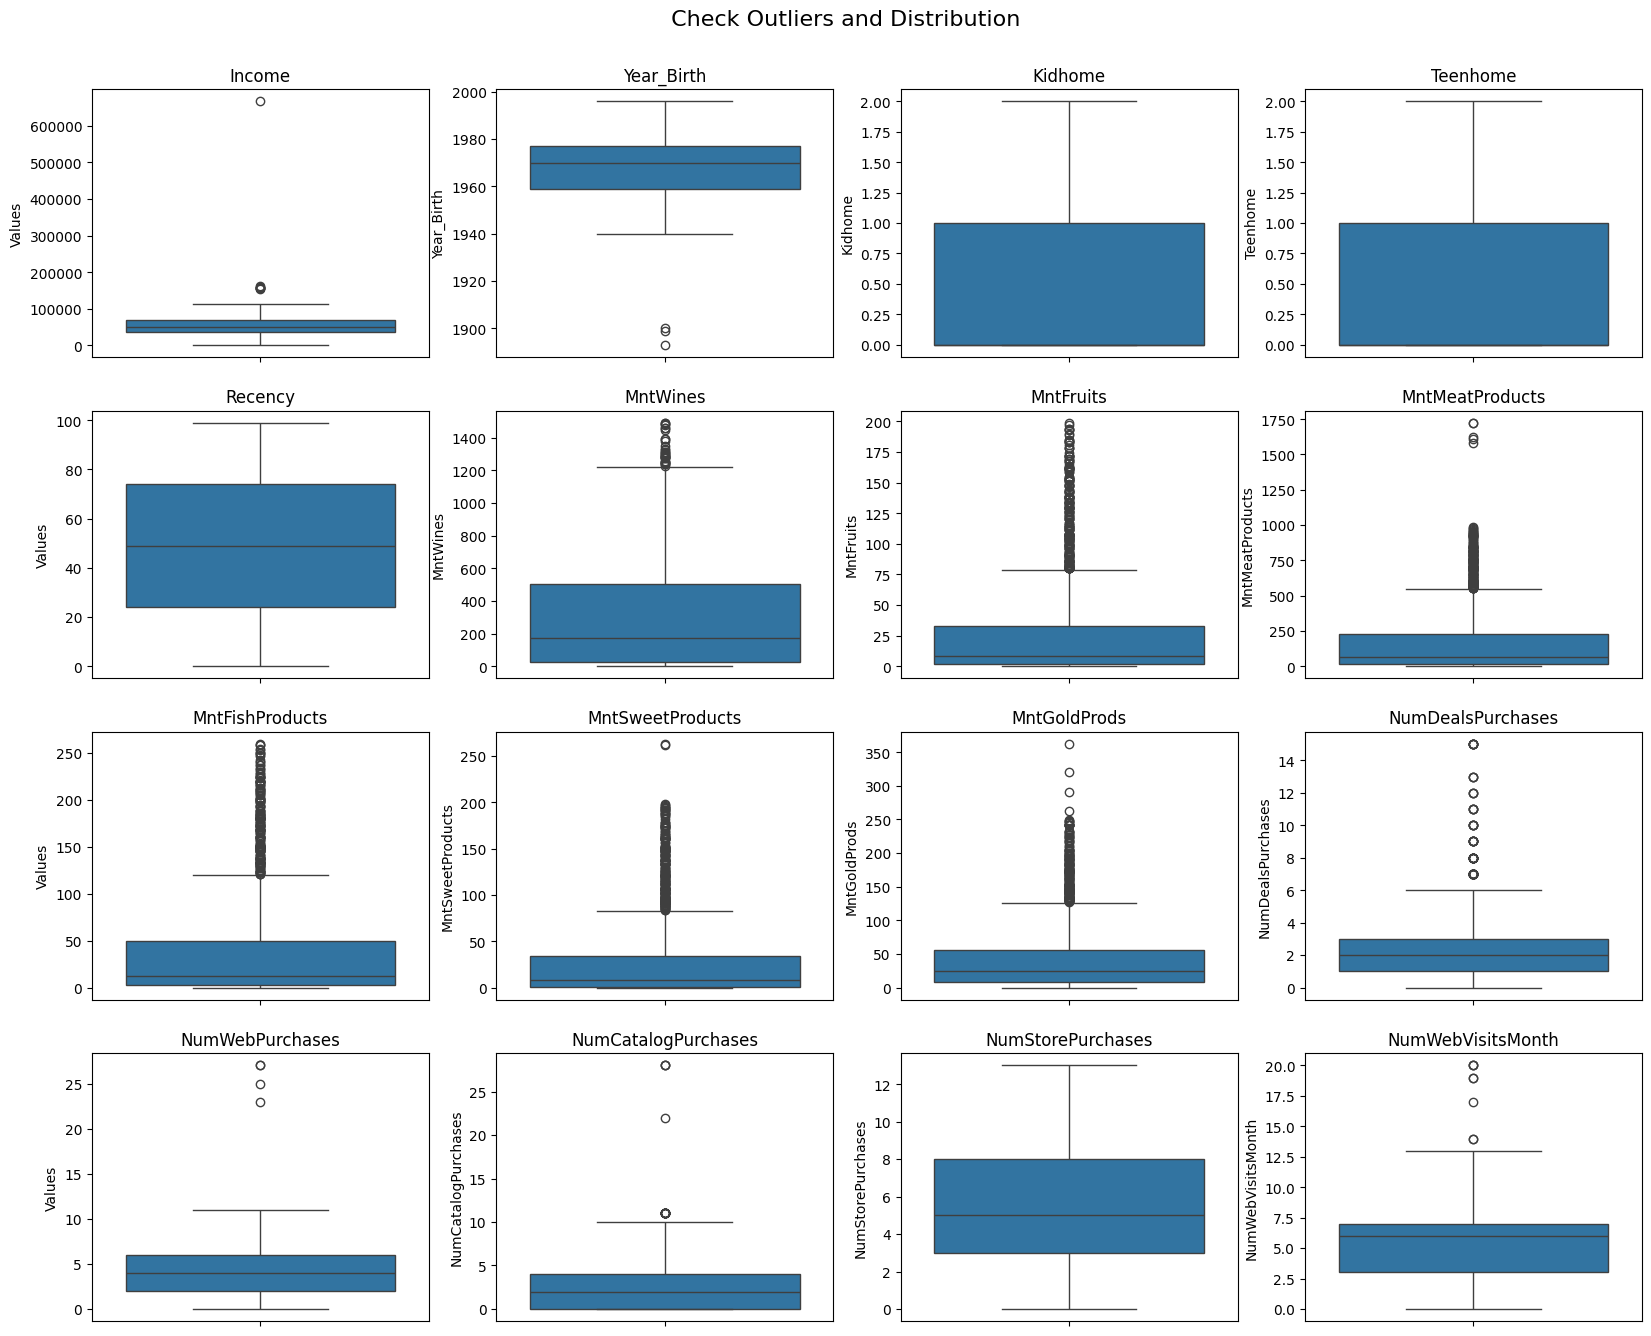

In [13]:
# Membuat Boxplot dari seluruh data yang numeric
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=df_numeric, rows=4, cols=4, suptitle=' Check Outliers and Distribution')

**Kesimpulan dari Hasil Boxplot Diatas**
1. Dari Hasil Boxplot diatas dapat kita pastikan bahwa seluruh data numeric yang kita punya ini tidak berdistribusi Normal melainkan hanya pada Kolom NumStorePurchases dan Recency yang harus dipastikan dengan melakukan Uji Normalitas.
2. **Pada kolom Income terdapat 1 Customer yang memiliki Income yang sangat jauh dari rata-rata yaitu sekitar 600.000 dan dianggap sebagai Outliers**
3. **Pada kolo Year Birth terdapat Customer yang lahir dibawah tahun 1920, dan dianggap sebagai Outliers** 
4. Untuk Outliers selain kolom Income dan Year Birth saya biarkan , karena saya asumsikan bahwa itu merupakan pembelian yang dilakukan Customer jadi mungkin saja bahwa ada Customer yang melakukan total transaksi jauh diatas rata-rata.

In [14]:
# Cek Outliers yang ada pada kolom Income
df[df['Income']>200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


Dari hasil Cek diatas kita sudah menemukan nomer index pada baris yang memiliki Income sangat jauh diatas rata-rata

In [15]:
# Cek Outliers yang ada pada kolom Year Birth
df[df['Year_Birth']<1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0


Dari hasil Cek diatas kita sudah menemukan nomer index pada baris yang memiliki Year_Birth yang sangat jauh dibawah rata-rata

### **Menghapus Outliers**

In [16]:
# Delete Outliers dikolom Income berdasarkan nomer Index
df.drop(2233,axis=0,inplace=True)

In [17]:
# Delete Outliers dikolom Year_Birth berdasarkan nomer Index
df.drop(192,axis=0,inplace=True)
df.drop(239,axis=0,inplace=True)
df.drop(339,axis=0,inplace=True)

Text(0.5, 1.0, 'Income')

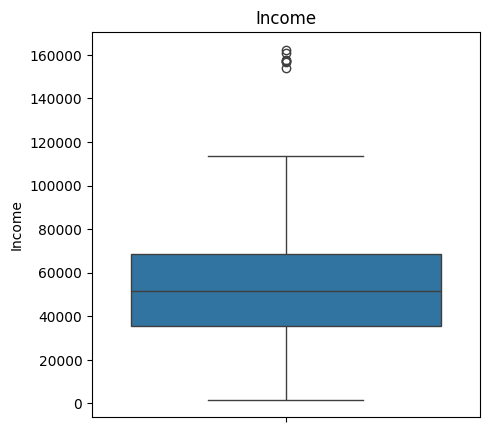

In [18]:
# Membuat Boxplot pada kolom Income
plt.figure(figsize=(5,5))
sns.boxplot(
    df['Income']
)
plt.title('Income')

Berdasarkan Boxplot pada Kolom Income diatas masih terdapat Outliers dan Data tidak berdistribusi dengan normal dan sebaran datanya Right Skewed

In [19]:
# Cek outliers yang tersisa pada kolom Income
df[df['Income']>120000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,0,3,11,0


Dari Tabel diatas saya asumsikan bahwa dari ke 7 pelanggan tersebut memang memiliki pendapatan lebih tinggi diatas rata2

### Mengatasi Missing Value

Pada proses sebelumnya kita mengetahui bahwa terdapat missing value pada kolom income dan telah melakukan delete duplicated value serta delete outliers. selanjutnya kita akan mengisi missing value tersebut dengan menggunakan median karena dari boxplot numerical sebelumnya sudah terlihat bahwa Distribusi pada kolom Income tidak berdistribusi dengan normal dan berbentuk ***Right Skewed***. 

saya lebih memilih fillna untuk mengatasi missing value pada kolom income karena persentase missing value pada kolom income hanya sekitar 1.18% yang berarti dampak dari mengisi missing value terhadap keseluruhan dataset relatif kecil. Juga karena jika menggunakan dropna pada kontkes ini mengurangi ukuran dataset secara tidak perlu.

In [20]:
# Melihat Median dari Income berdasarkan Education
median_values = df.groupby('Education')['Income'].median()
median_values

Education
2n Cycle      46772.0
Basic         20194.0
Graduation    52332.0
Master        51044.5
PhD           55236.0
Name: Income, dtype: float64

Diatas adalah hasil Median dari kolom Income berdasarkan Education yang dimiliki oleh Customer

In [21]:
# Mengisi Missing Values berdasarkan Median Income tiap Education
for edu, median in median_values.items():
    df.loc[(df['Income'].isna()) & (df['Education'] == edu), 'Income'] = median

Mengisi Missing Value dengan Median dari kolom Income Berdasarkan Education yang dimiliki oleh Customer

In [22]:
# Check for missing values in all columns
missing_values = df.isna().sum()
missing_values

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Sudah tidak ada Missing Value dikolom Income

### Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [23]:
# Menampilkan informasi dari setiap Kolom
df_deepInfo = pd.DataFrame({
    'dataFeatures': df.columns,
    'dataType': df.dtypes.values,
    'null': df.isna().sum().values,
    'nullPct': round((df.isna().sum() / len(df) * 100), 2).values,
    'unique': df.nunique().values,
    'uniqueSample': [df[col].sample(3).values for col in df.columns]
})

print(df.shape)
df_deepInfo


(2035, 29)


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.0,2035,"[9780, 3033, 193]"
1,Year_Birth,int64,0,0.0,56,"[1970, 1981, 1984]"
2,Education,object,0,0.0,5,"[PhD, Graduation, PhD]"
3,Marital_Status,object,0,0.0,8,"[Married, Divorced, Single]"
4,Income,float64,0,0.0,1972,"[59292.0, 59432.0, 39763.0]"
5,Kidhome,int64,0,0.0,3,"[1, 0, 0]"
6,Teenhome,int64,0,0.0,3,"[1, 0, 0]"
7,Dt_Customer,object,0,0.0,663,"[22-09-2012, 21-01-2013, 03-05-2013]"
8,Recency,int64,0,0.0,100,"[28, 30, 13]"
9,MntWines,int64,0,0.0,775,"[6, 23, 1184]"


* Jumlah Baris&Kolom Sebelum Data Cleaning(2240, 29)
* Jumlah Baris&Kolom Sesudah Data Cleaning(2035, 29)

Sebelum dibersihkan, kita memiliki 2240 baris data, sekarang kita memiliki 2035 baris. Berkurang 5 baris data dan data kosong diisi dengan data yang dirasa relevan.



# Feature Engineering

### Apa itu Feature Engineering?
Feature engineering dalam konteks data analysis adalah proses mengubah atau membuat fitur (kolom) baru dari data yang ada untuk mendapatkan wawasan yang lebih mendalam, menemukan pola, dan mendukung analisis yang lebih efektif. Ini melibatkan transformasi data mentah menjadi bentuk yang lebih berguna dan informatif untuk analisis.
#### Mengapa Feature Engineering Penting untuk Analisis Data?

* **Memperbaiki Kualitas Data**: Mengatasi masalah seperti missing values, outliers, dan inkonsistensi data.
* **Meningkatkan Interpretasi Data**: Membuat data lebih mudah dipahami dan dianalisis dengan mengubah atau membuat fitur baru yang lebih informatif.
* **Mengidentifikasi Pola dan Tren**: Membantu dalam menemukan pola, tren, dan hubungan antara variabel yang mungkin tidak terlihat dalam data mentah.
* **Mendukung Visualisasi Data**: Membuat fitur baru yang dapat digunakan untuk visualisasi data yang lebih efektif dan informatif.
* **Menyederhanakan Analisis**: Mengurangi kompleksitas data dengan menggabungkan atau mengubah fitur, sehingga analisis menjadi lebih sederhana dan fokus.

#### Beberapa Contoh Aktivitas dalam Feature Engineering:

1. **Membuat Kolom Baru**:
   - Menggabungkan beberapa kolom menjadi satu kolom baru.
   - Menghitung nilai baru berdasarkan kolom yang ada (misalnya, total pendapatan dari jumlah terjual dan harga).

2. **Transformasi Fitur**:
   - Mengubah format data (misalnya, mengubah tanggal menjadi hari dalam seminggu).
   - Normalisasi atau standarisasi data untuk memastikan semua fitur berada dalam skala yang sama.
   - Binning: Mengelompokkan data numerik ke dalam interval (bin) untuk mengubah fitur kontinu menjadi fitur kategorikal.

3. **Encoding Fitur Kategorikal**:
   - Mengubah fitur kategorikal menjadi numerik menggunakan teknik seperti one-hot encoding atau label encoding.

4. **Menghapus Fitur yang Tidak Relevan**:
   - Menghapus kolom yang tidak memberikan informasi yang berguna atau yang redundan.

5. **Menggunakan Teknik Statistik**:
   - Menghitung statistik seperti rata-rata, median, atau standar deviasi dari kelompok data untuk membuat fitur baru.

#### Sumber:
- [Feature Engineering: Dasar, Teknik, dan Praktik Terbaik](https://bpjiid.uma.ac.id/2024/07/23/feature-engineering-dasar-teknik-dan-praktik-terbaik/)
- [Step-by-Step Process of Feature Engineering for Machine Learning Algorithms in Data Science](https://www.analyticsvidhya.com/blog/2021/03/step-by-step-process-of-feature-engineering-for-machine-learning-algorithms-in-data-science/)


### Mengubah Tipe Data DT_Customer ke datetime

In [24]:
# Mengubah Tipe Data Dt_Customer menjadi Date Time
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Mengubah tipe data pada kolom Dt_Customer yang sebelumnya tipe datanya adalah Object menjadi Datetime

### Menghapus kolom-kolom yang tidak diperlukan
* Setelah melihat dan menganalisa semua kolom pada data secara manual, Saya menyimpulkan Kolom Z Cost Contact dan Z Revenue tidak diperlukan dan sebaiknya dihapus karena tidak diketahui nilainya dan seluruh baris memiliki nilai yang sama sehingga tidak ada hubungan dengan kolom yang lainnya. Bahkan di file Supermarket Customers Data Dictionary.pdf yang diberikan oleh perusahaan tidak ada penjelasan deskripsi tentang kedua kolom tersebut.

* Namun untuk lebih jelasnya saya akan membuat ScatterPlot untuk melihat apakah ada hubungan antara kolom Z_CostContact dan Z_Revenue dengan kolom lain

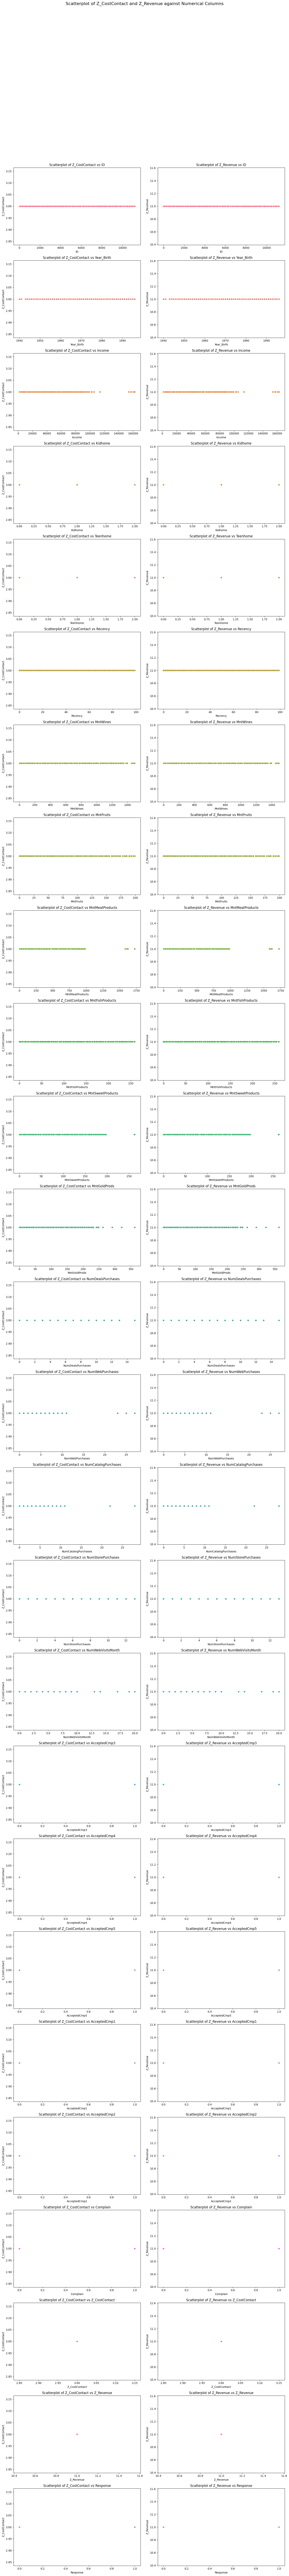

In [25]:
# Membuat scatterplot untuk Z_CostContact dan Z_Revenue terhadap semua kolom numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
fig, axs = plt.subplots(len(numerical_columns), 2, figsize=(15, 5 * len(numerical_columns)))
fig.suptitle('Scatterplot of Z_CostContact and Z_Revenue against Numerical Columns', y=1.02, size=16)

# Define a color palette
palette = sns.color_palette("husl", len(numerical_columns))

for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=df[col], y=df['Z_CostContact'], ax=axs[i, 0], color=palette[i])
    axs[i, 0].set_title(f'Scatterplot of Z_CostContact vs {col}')
    sns.scatterplot(x=df[col], y=df['Z_Revenue'], ax=axs[i, 1], color=palette[i])
    axs[i, 1].set_title(f'Scatterplot of Z_Revenue vs {col}')

plt.subplots_adjust(hspace=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Terlihat pada hasil visualisasi scatterplot menunjukan garis horizontal sempurna yang berarti tidak ada hubungan/korelasi antara kolom Z_CostContact dan Z_Revenue dengan kolom lainnya.

oleh karena itu saya akan menghapus kedua kolom tersebut

### **Menghapus Kolom Z_CostContact dan Z_Revenue**

In [26]:
# Menghapus Kolom Z_CostContact dan Z_Revenue
df.drop('Z_CostContact', axis=1, inplace=True)
df.drop('Z_Revenue', axis=1, inplace=True)

In [27]:
# Cek kolom yang ada pada dataframe
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Kolom Z_CostContact dan Z_Revenue berhasil dihapus

### Merubah Value pada kolom Marital Status

In [28]:
# Cek Unique Value pada kolom Marital Status
df['Marital_Status'].value_counts()

Marital_Status
Married     788
Together    515
Single      444
Divorced    212
Widow        70
Alone         3
Absurd        2
YOLO          1
Name: count, dtype: int64

Merubah Value pada kolom Marital Status
1. Alone menjadi Single (terdapat 3 baris)
2. Absurd menjadi Together (terdapat 2 baris)
3. YOLO menjadi Single (terdapat 1 baris)
4. Widow menjadi Divorced

In [29]:
# Merubah nilai Alone dan Yolo menjadi Single
df['Marital_Status'].replace('Alone', 'Single', inplace=True)
df['Marital_Status'].replace('YOLO', 'Single', inplace=True)
# Merubah nilai Absurd menjadi Together
df['Marital_Status'].replace('Absurd', 'Together', inplace=True)
# Merubah nilai Widow menjadi Divorced
df['Marital_Status'].replace('Widow', 'Divorced', inplace=True)
df['Marital_Status'].value_counts()

Marital_Status
Married     788
Together    517
Single      448
Divorced    282
Name: count, dtype: int64

### **Merubah Value pada kolom Education**

In [30]:
# Melihat total pengulangan nilai Unique pada kolom Education
df['Education'].value_counts()

Education
Graduation    1024
PhD            441
Master         337
2n Cycle       184
Basic           49
Name: count, dtype: int64

In [31]:
# Merubah nilai 2n Cycle menjadi Master
df['Education'].replace('2n Cycle', 'Master', inplace=True)
# Melihat total pengulangan nilai Unique pada kolom Education setelah ada perubahan
df['Education'].value_counts()

Education
Graduation    1024
Master         521
PhD            441
Basic           49
Name: count, dtype: int64

Merubah nilai kategori 2n Cycle menjadi master pada kolom Education karena dalam beberapa sistem pendidikan, 2n Cycle sangat mirip dengan tingkat Master dalam hal kurikulum dan pendidikan yang diberikan.

### **Tambah Kolom Generation**

Karena pada Dataset tidak diberitahukan rentang dataset pasti maka kita tidak dapat mengetahui umur pasti dari Customer melainkan hanya pada tahun lahir Customer , oleh karena itu saya membuat Kolom baru yang bernama Generation untuk mengkategorikan tahun lahir Customer berdasarkan Generasi. Saya melakukan binning berdasarkan rentang tahun pada masing-masing Generation.
1. Pre Boomer : Kelahiran sebelum tahun 1946
1. Baby Boomer: Kelahiran sekitar tahun 1946 hingga 1964.
2. Generasi X: Kelahiran sekitar tahun 1965 hingga 1980.
3. Generasi Y (Millennials): Kelahiran sekitar tahun 1981 hingga 1996.
4. Generasi Z: Kelahiran setelah tahun 1996.
- Sumber : https://www.djkn.kemenkeu.go.id/kpknl-pontianak/baca-artikel/14262/Generasi-Milenial-Dan-Generasi-Kolonial.html

In [32]:
# Menambah kolom Generation
df['Generation'] = pd.cut(df['Year_Birth'], bins=[1939, 1945, 1964, 1980, 1996,], 
                          labels=['Pre Boomer', 'Baby Boomer', 'Generasi X', 'Millennials'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,Baby Boomer
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,Baby Boomer
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,Generasi X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,Millennials
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,Millennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,3,4,0,0,0,0,0,0,0,Millennials
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,Generasi X
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,Millennials
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,Baby Boomer


In [33]:
# Melihat Nilai Unique beserta total pengulangannya yang ada pada kolom Generation
df['Generation'].value_counts()

Generation
Generasi X     974
Baby Boomer    691
Millennials    347
Pre Boomer      23
Name: count, dtype: int64

### **Tambah Kolom Income_Category**

Menambahkan kolom Income_Category untuk melakukan pengkategorian pelanggan berdasarkan Income

In [34]:
# Menampilkan Uji Statistik Deskriptif pada kolom Income
df['Income'].describe()

count      2035.000000
mean      52044.134398
std       21488.281598
min        1730.000000
25%       35694.500000
50%       51650.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64

Berdasarkan Statistik Deskriptif pada kolom Income diatas maka saya melakukan binning berdasarkan rentang dari min(P1),25%(P25), 50%(P50), 75%(P75), dan max(P100) pada statistik sebagai berikut :
1. Low = Income yang dalam rentang 1730 sampai 35694 
2. Middle = Income yang dalam rentang 35694 sampai 51650
3. High = Income yang dalam rentang 51650 sampai 68277.5
4. Very High = 68277.5 sampai 162397

In [35]:
# Membuat fungsi untuk membuat kolom baru Income Category
def income_category(income):
    if income <= 35694:
        return 'Low'
    elif income <= 51650:
        return 'Middle'
    elif income <= 68277.5:
        return 'High'
    else:
        return 'Very High'

df['Income_Category'] = df['Income'].apply(income_category)


In [36]:
# Cek Value Count pada kolom Income Categpry
df['Income_Category'].value_counts()

Income_Category
Middle       509
Very High    509
Low          509
High         508
Name: count, dtype: int64

## Tambah Kolom Total Amount

In [37]:
# Menambah Kolom Total Amount
total_amount= df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.insert(loc=15, column='Total_Amount', value=total_amount)

total_amount

0       1617
1         27
2        776
3         53
4        422
        ... 
2232      22
2235    1341
2237    1241
2238     843
2239     172
Length: 2035, dtype: int64

Menambah Kolom Total_Amount dengan menambahkan semua amount yang dikeluarkan oleh pelanggan dari setiap kategori produk agar kita dapat mengetahui Total Amount keseluruhan yang dikeluarkan oleh setiap pelanggan di Supermarket.

## Tambah Kolom Freq_Purchases

In [38]:
# Menambah Kolom Frequensi pembelian yang dilakukan Customer
df.insert(loc=21, column='Freq_Purchases', value= df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases'])

Menambahkan Kolom Freq_Purchases untuk melihat total frekuensi pembelian yang dilakukan oleh Customer diSupermarket berdasarkan pembelian yang dilakukan dari 3 channel pembelian Supermarket yaitu Catalogue, Store dan Web

## Summary Feature Enginering yang dilakukan

1. Menghapus Kolom Z Cost Contact dan Z Revenue karena tidak diketahui Nilai nya dan seluruh baris memiliki nilai yang sama sehingga tidak ada hubungan dengan kolom kolom yang lainnya.
2. Menambah Kolom Total Amount yang nilainya adalah penambahan dari seluruh pembelian yang dilakukan oleh customer disetiap kategori produk dan semua tempat pembelian(Store, Web, dan Catalogue).
5. Menambah Kolom Frequency Purchases yang nilainya adalah total jumlah transaksi dari ketiga tempat pembelian yang telah dilakukan oleh Customer (Store,Web,dan Catalogue)
7. Mengganti nilai yang ada pada Marital Status.
8. Mengganti nilai yang ada pada Education.
8. Menambah Kolom Generation untuk mengkategorikan Tahun lahir dari setiap Customer.
   



|Nama Kolom Tambahan| Keterangan|
|----------|------------|
|Total_Amount | Total Pengeluaran Customer|
|Generation | Generasi berdasarkan tahun lahir|
|Freq_Purchases | Frekuensi pembelian yang sudah dilakukan customer disemua Channel Supermarket|
|Income_Category | Kategori berdasarkan pendapatan Customer|
```python


# Data Analysis

## **General Data Analysis**

In [39]:
# Menampilkan data yang sudah bersih
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Freq_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation,Income_Category
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,22,0,0,0,0,0,0,1,Baby Boomer,High
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,4,0,0,0,0,0,0,0,Baby Boomer,Middle
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,20,0,0,0,0,0,0,0,Generasi X,Very High
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,Millennials,Low
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,14,0,0,0,0,0,0,0,Millennials,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,3,0,0,0,0,0,0,0,Millennials,Low
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,16,0,0,0,0,0,0,0,Generasi X,High
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,18,0,1,0,0,0,0,0,Millennials,High
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,21,0,0,0,0,0,0,0,Baby Boomer,Very High


Data yang sudah bersih terdapat 2035 baris dan 31 kolom

### Uji Normalitas pada kolom Total_Amount

In [40]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for normality
stat, p_value = shapiro(df['Total_Amount'])

print('Statistics=%.3f, p=%.3f' % (stat, p_value))

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print('Sample berdistribusi normal (gagal menolak H0)')
else:
    print('Sampel tidak berdistribusi normal (tolak H0)')

Statistics=0.865, p=0.000
Sampel tidak berdistribusi normal (tolak H0)


Histogram Total Amount

In [41]:
import plotly.graph_objects as go

# Create histogram with more bins
fig = go.Figure(data=[go.Histogram(
    x=df['Total_Amount'],
    nbinsx=100,  # Increase the number of bins to make bars narrower
    marker=dict(
        color='#636efa',
        line=dict(
            color='#000000',
            width=1
        )
    )
)])

# Update layout
fig.update_layout(
    title='Total_Amount Distribution',
    xaxis_title='Total_Amount',
    yaxis_title='count',
    bargap=0,  # Set bargap to 0 to remove gaps between bars
    yaxis_type='log',  # Optional: Use log scale for y-axis if needed
    yaxis=dict(tickformat='d')  # Display full numbers on y-axis
)

# Show plot
fig.show()

Dapat dilihat pada histogram diatas bahwa bentuk distribusi data Total_Amount tidak normal. Distribusi data Total_Amount berbentuk Right Skew.

**Statistik Deskriptif Kategori Produk dan Total_Amount**

In [42]:
import plotly.graph_objects as go

# Create descriptive statistics table
desc_stats = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Amount']].describe().round(2).transpose().sort_values(by='50%', ascending=False)

# Create a Plotly table with updated colors
fig = go.Figure(data=[go.Table(
       header=dict(values=['Statistic'] + list(desc_stats.columns),
                            fill_color='lightblue',
                            line_color='darkslategray',
                            align='left'),
       cells=dict(values=[desc_stats.index] + [desc_stats[col] for col in desc_stats.columns],
                        fill_color='lightyellow',
                        line_color='darkslategray',
                        align='left'))
])

fig.update_layout(title='Descriptive Statistics of Product Categories and Total Amount')
fig.show()

Kesimpulan:
1. Total Amount: Pelanggan memiliki rentang belanja yang sangat luas, dari $5 hingga $2525, dengan median sekitar $396.

2. Wines: Produk ini tampaknya sangat populer, dengan pembelian median sebesar $335 dan pembelian maksimum hingga $1493.

3. Meat Product: Meskipun median pembelian lebih rendah ($68), ada pelanggan yang menghabiskan hingga $1725 pada produk ini.

4. Gold Product: Median pembelian adalah $24, dengan pembelian maksimum hingga $362.

5. Fish Product: Tampaknya kurang populer dibandingkan dengan Wine atau Meat, dengan median pembelian hanya $12.

6. Sweet Product: Seperti Fish Product, tampaknya kurang populer dengan median hanya $8.

7. Fruits: Sama seperti Sweet Product, Fruits juga memiliki median pembelian yang rendah, yaitu $8.



### **Uji Korelasi**

Melakukan Uji Korelasi pada seluruh Kategori yang ada di Supermarket dengan Total Amount yang dikeluarkan oleh Customer

In [43]:
# Membuat Uji Korelasi Spearman dari seluruh rata2 Amount of Product Category dan Total Amount
df_corr = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_Amount']].corr('spearman').transpose()

import plotly.express as px

fig = px.imshow(df_corr, text_auto=True, aspect="auto", color_continuous_scale='Blues')
fig.update_layout(title='Spearman Correlation Heatmap of Product Categories and Total Amount')
fig.show()

**Kesimpulan dari Uji Korelasi antara seluruh Kategori Produk dengan Total Amount**
1. Wine dan Total Pengeluaran: Ada korelasi yang sangat kuat antara pembelian Wine (MntWines) dan total pengeluaran (Total_Amount) dengan nilai korelasi 0.925. Ini menunjukkan bahwa pelanggan yang membeli Wine cenderung juga membeli produk lain dan menghabiskan lebih banyak uang secara keseluruhan.

2. Meat Products dan Total Pengeluaran: Ada korelasi yang sangat kuat antara Meat Products (MntMeatProducts) dan total pengeluaran dengan nilai korelasi 0.939, yang hampir mendekati 1. Ini menunjukkan bahwa produk daging juga sangat penting dalam menentukan total pengeluaran pelanggan.

3. Korelasi Antar Kategori Produk: Ada korelasi positif antara hampir semua kategori produk, menunjukkan bahwa pelanggan yang membeli satu jenis produk cenderung juga membeli jenis produk lain. Misalnya, Wine dan Meat Products memiliki korelasi sebesar 0.821.

### Bar Chart Pelanggan yang tidak membeli wine dan meat sama sekali

In [44]:
import plotly.express as px

# Melihat Customer yang tidak pernah membeli Wines dan Meat Product
no_wine_customers = df[df['MntWines'] == 0]
no_meat_customers = df[df['MntMeatProducts'] == 0]

# Count the number of customers who never bought Wines and Meat Products
no_wine_count = no_wine_customers.shape[0]
no_meat_count = no_meat_customers.shape[0]

# Create a DataFrame for visualization
data = {
    'Category': ['No Wine Purchases', 'No Meat Purchases'],
    'Count': [no_wine_count, no_meat_count]
}
df_vis = pd.DataFrame(data)

# Create a bar chart
fig = px.bar(df_vis, x='Category', y='Count', title='Number of Customers with No Purchases of Wines and Meat Products', 
             color='Category', text='Count', hover_data={'Category': True, 'Count': True})

# Show the plot
fig.show()


Dari Bar Chart diatas dapat kita simpulkan bahwa :
1. Dari 2035 Customer hanya 12 Customer yang tidak pernah membeli Wines Product 
2. Dari 2035 Customer hanya 1 Customer yang tidak pernah membeli Meat Product

### **Uji Korelasi Diskon dengan Frekuensi dan Total Amount**

In [45]:
# Membuat Korelasi antara total pembelian dengan diskon, frekuensi dan total amount Customer
df[['NumDealsPurchases','Freq_Purchases','Total_Amount']].corr('spearman').transpose()
import plotly.express as px

# Membuat heatmap korelasi
fig = px.imshow(df[['NumDealsPurchases', 'Freq_Purchases', 'Total_Amount']].corr('spearman'), 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='Blues')

fig.update_layout(title='Spearman Correlation Heatmap of Deals, Frequency, and Total Amount')
fig.show()


(NumDealsPurchases = total pembelian dengan diskon)

Berdasarkan hasil uji korelasi di atas maka dapat disimpulkan bahwa :
1. Nilai korelasi antara NumDealsPurchases dengan total amount sebesar -0.012411 yang artinya adalah Diskon tidak mempengaruhi      Total Amount karena nilai korelasinya sangat kecil dan dekat dengan dengan 0
2. Nilai korelasi antara NumDealsPurchases dengan Freq_Purchases sebesar 0.109374 yang artinya adalah Diskon tidak terlalu mempengaruhi Frekuensi Pembelian karena nilai korelasi nya sangat kecil dan dekat dengan 0
3. Dapat dianggap bahwa pelanggan Supermarket tidak terlalu termotivasi oleh diskon saat membuat keputusan pembelian, yang berarti ada faktor lain yang lebih mempengaruhi keputusan mereka.

Rekomendasi:

1. Evaluasi Ulang Strategi diskon atau penawaran khusus Supermarket. Karena Diskon tidak terlalu mempengaruhi total pengeluaran atau frekuensi pembelian.





### **Total Amount by Product Category in Supermarket**

In [46]:
import plotly.express as px
# Membuat variabel baru yang berisikan semua kategori produk
df_product = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]

# Create a new DataFrame for the sum of each product category
df_product_sum = df_product.sum().reset_index()
df_product_sum.columns = ['Product', 'Total_Amount']

# Create a bar chart with different colors for each bar
fig = px.bar(df_product_sum, x='Product', y='Total_Amount', title='Total Amount by Product Category in Supermarket',
             color='Product', color_discrete_sequence=px.colors.qualitative.Plotly)

# Show the plot
fig.show()


Berdasarkan Bar Chart diatas dapat disimpulkan bahwa :
1. Pengeluaran Tertinggi di Kategori Wine: Berdasarkan data, pengeluaran tertinggi oleh pelanggan terjadi di kategori produk Wine, dengan total penjualan yang mencapai 617,707.

2. Kategori Meat sebagai Runner-Up: Kategori produk Meat menempati posisi kedua dengan total penjualan sebesar 341,460, menunjukkan minat pelanggan yang juga signifikan pada kategori ini.

3. Pengeluaran Menengah di Kategori Fish Product dan Gold Product: Kategori Fish Product dan Gold Product memiliki total penjualan sebesar 76,248 dan 88,964, menunjukkan bahwa kategori ini memiliki daya tarik menengah di antara pelanggan.

4. Pengeluaran Terendah di Kategori Buah dan Sweet: Kategori produk dengan total penjualan terendah adalah Buah dan Sweet, dengan angka sebesar 53,566 dan 55,244, menunjukkan bahwa kategori ini mungkin kurang menarik bagi pelanggan saat ini.

### **Acceptance of Marketing Campaigns Bar Chart**

In [47]:
import plotly.express as px

# Create a DataFrame for the sum of accepted campaigns
campaign_data = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum().reset_index()
campaign_data.columns = ['Campaign', 'Accepted']

# Define colors for each campaign
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Create the bar plot
fig = px.bar(campaign_data, x='Campaign', y='Accepted', title='Customer Acceptance of Marketing Campaigns', color='Campaign', color_discrete_sequence=colors, text='Accepted')

# Show the plot
fig.show()


Berdasarkan kolom total campaign yang diterima oleh Customer diatas dapat disimpulkan bahwa :
1. Kampanye Paling Efektif: AcceptedCmp4 adalah kampanye dengan penerimaan tertinggi, diikuti oleh AcceptedCmp3, AcceptedCmp5 dan AcceptedCmp1.
2. Kampanye Kurang Efektif: AcceptedCmp2 adalah kampanye dengan penerimaan terendah, yang mungkin menunjukkan bahwa kampanye ini kurang sesuai dengan minat pelanggan.

### **Proportion of Purchase Channels in Supermarkets**

In [48]:
import plotly.express as px

# Define bright colors
bright_colors = ['#FF5733', '#33FF57', '#3357FF']

# Summarize the purchase channels
purchase_channels = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
purchase_channels.columns = ['Channel', 'Total']

# Create the pie chart
fig = px.pie(purchase_channels, values='Total', names='Channel', title='Proportion of Purchase Channels in Supermarkets', color_discrete_sequence=bright_colors)

# Show the plot
fig.show()

Berdasarkan Pie Chart Distribusi dari pembelian di ketiga channel yang dilakukan oleh Customer diatas dapat disimpulkan :

1. Store: Sebagai saluran dengan proporsi pembelian terbesar (46.1%), ini menunjukkan bahwa toko fisik masih menjadi pilihan utama bagi pelanggan Supermarket.

2. Web: Dengan proporsi 32.7%, pembelian online juga menjadi saluran yang cukup populer, menunjukkan kecenderungan konsumen yang semakin digital.

3. Catalogue: Meskipun memiliki proporsi lebih kecil (21.2%), katalog masih menjadi saluran yang relevan dan mungkin menarik bagi segmen pelanggan tertentu.

Rekomendasi:

1. Optimalkan Pengalaman Toko: Mengingat banyaknya pelanggan yang lebih suka berbelanja di toko, memastikan pengalaman berbelanja yang menyenangkan di toko fisik bisa menjadi prioritas. bisa juga memasang berbagai iklan atau promo menarik di store seperti beli 2 gratis 1 untuk mendorong pengunjung berbelanja lebih banyak.

2. Tingkatkan Web Experience: Dengan hampir sepertiga pembelian dilakukan secara online, investasi lebih lanjut dalam UX dan UI website bisa sangat bermanfaat untuk meningkatkan conversion rate pembelian.

3. Personalisasi Katalog: Untuk 21.2% pelanggan yang berbelanja melalui katalog, pertimbangkan untuk menawarkan katalog yang lebih terpersonalisasi berdasarkan preferensi pelanggan.

### **Customer Enrollment Trend**

In [49]:
# Mengelompokkan per bulan dan menghitung jumlah pelanggan
monthly_counts = df.resample('M', on='Dt_Customer').size()

In [50]:
import plotly.express as px

# Mengelompokkan per bulan dan menghitung jumlah pelanggan
monthly_counts_all = monthly_counts.loc['2012-01-01':'2014-12-31']

# Membuat plot
fig = px.line(
    x=monthly_counts_all.index, 
    y=monthly_counts_all.values, 
    labels={'x': 'Month', 'y': 'Number of New Customers'}, 
    title='Customer Enrollment Trend in 2012 - 2014'
)

# Menambahkan anotasi untuk setiap titik
for i, value in enumerate(monthly_counts_all.values):
    fig.add_annotation(
        x=monthly_counts_all.index[i], 
        y=value, 
        text=str(value), 
        showarrow=True, 
        arrowhead=2
    )

fig.update_xaxes(tickformat='%Y-%m', tickangle=45)
fig.show()

Kesimpulan:
1. Tren Pendaftaran: Ada variasi dalam jumlah pendaftaran pelanggan dari bulan ke bulan, tetapi tidak ada pola jelas yang terlihat hanya dari data ini.
2. Pendaftaran Tertinggi: Ada beberapa bulan dengan pendaftaran yang lebih tinggi, seperti Agustus 2012 dan Oktober 2013, masing-masing dengan 105 pendaftaran.
3. Pendaftaran Terendah: Februari 2014 menunjukkan pendaftaran terendah dengan hanya 69 pelanggan baru.

Rekomendasi:
1. Analisis Musiman: Jika ada data tambahan mungkin bisa dilakukan untuk melakukan analisis musiman untuk melihat apakah ada pola musiman dalam pendaftaran pelanggan.

### **Pie Chart Of Customers Complain**

In [51]:

import plotly.express as px

# Create a DataFrame for the complain data
complain_data = df['Complain'].value_counts().reset_index()
complain_data.columns = ['Complain', 'Count']
complain_data['Complain'] = complain_data['Complain'].map({0: 'No Complain', 1: 'Complain'})

# Create the pie chart
fig = px.pie(complain_data, values='Count', names='Complain', title='Pie Chart of Customer Complain', color_discrete_sequence=colors, hole=0.3)

# Show the plot
fig.show()

Kesimpulan :
Dari proporsi Pie Chart Of Customers Complain diatas terlihat bahwa hasilnya adalah 0,9% yang pernah mengajukan complain
Artinya adalah layanan yang telah dilakukan Supermarket sudah baik sehingga sangat sedikit pelanggan yang melakukan complain.

Rekomendasi:
Analisis Keluhan: Walaupun jumlahnya sedikit, tetap penting untuk menganalisis keluhan yang ada untuk mendapatkan wawasan tentang aspek mana yang mungkin perlu ditingkatkan.

## **Analysis Berdasarkan Marital Status**

### **Proporsi Customer Berdasarkan Marital Status**

In [52]:
import plotly.express as px

# Create a DataFrame for the marital status data
marital_status_data = df['Marital_Status'].value_counts().reset_index()
marital_status_data.columns = ['Marital_Status', 'Count']
marital_status_data['Marital_Status'] = marital_status_data['Marital_Status'].map({
    'Married': 'Married', 
    'Together': 'Together', 
    'Single': 'Single', 
    'Divorced': 'Divorced'
})

# Define colors with bright red for 'Married'
colors = ['#FF0000' if status == 'Married' else color for status, color in zip(marital_status_data['Marital_Status'], bright_colors)]

# Create the pie chart
fig = px.pie(marital_status_data, values='Count', names='Marital_Status', title='Proportion of Customers Based on Marital Status', color_discrete_sequence=colors, hole=0.3)

# Show the plot
fig.show()

Berdasarkan Pie Chart Distribusi dari Marital Status diatas dapat disimpulkan bahwa :
1. Proporsi Marital Status Customer paling banyak adalah Married yaitu sebesar 38,7%
2. Proposi Marital status paling sedikit adalah Divorced yaitu sebesar 13,9%

### **Distribusi Income Category Berdasarkan Marital Status** 

In [53]:
import plotly.express as px

# Membuat pivot table untuk Income Category berdasarkan Marital Status
pivot_table = df.pivot_table(index='Marital_Status', columns='Income_Category', aggfunc='size', fill_value=0)

# Mengurutkan kolom income_category dari Low, Middle, High, Very High
pivot_table = pivot_table[['Low', 'Middle', 'High', 'Very High']]

# Membuat heatmap menggunakan Plotly
fig = px.imshow(pivot_table, text_auto=True, aspect="auto", color_continuous_scale='Viridis')
fig.update_layout(title='Income Category by Marital Status')
fig.show()

Married & High Income: Dengan 204 pelanggan, ini adalah segmen terbesar didalam Supermarket. Ini menunjukkan bahwa pelanggan yang menikah dengan pendapatan tinggi dapat dijadikan target utama dari Supermarket.

### **Heatmap Median Pengeluaran Berdasarkan Marital Status**

In [54]:
import plotly.express as px
median_table = df[['Marital_Status','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Amount']].groupby('Marital_Status').median().reset_index().sort_values(by='Total_Amount',ascending=False)
# Create a heatmap for the median values
fig = px.imshow(median_table.set_index('Marital_Status').transpose(), 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='Blues')  # Menggunakan skala warna 'Blues' untuk efek semakin gelap

fig.update_layout(title='Median Spending by Product Category and Marital Status')
fig.show()


Berdasarkan heatmap agregasi pada Marital Status diatas dapat disimpulkan bahwa :
1. Divorced : Pelanggan yang bercerai tampaknya menghabiskan paling banyak pada wine, dengan median sekitar 207.0 

2. Seluruh Marital Status paling banyak melakukan pengeluaran pada kategori Wine

3. Untuk pengeluaran terbesar kedua terdapat pada kategori Meat


### **Median Total Pengeluaran Berdasarkan Marital Status**

In [55]:
import plotly.express as px

# Mengurutkan Marital_Status berdasarkan median Total_Amount
sorted_status = df.groupby('Marital_Status')['Total_Amount'].median().sort_values(ascending=False).index

# Membuat DataFrame untuk plot
median_total_amount = df.groupby('Marital_Status')['Total_Amount'].median().reindex(sorted_status).reset_index()

# Membuat bar plot menggunakan Plotly
fig = px.bar(median_total_amount, x='Marital_Status', y='Total_Amount', 
             title='Median Total Amount by Marital Status', 
             labels={'Total_Amount': 'Median Total Amount', 'Marital_Status': 'Marital Status'},
             color='Marital_Status', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Menambahkan angka tepatnya di atas setiap bar dengan padding
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside', textfont_size=12, cliponaxis=False)

fig.show()


Berdasarkan pada Bar Chart diatas dapat disimpulkan bahwa :
1. Divorced Customers: Dengan Median Total Amount sebesar 502 USD, pelanggan ini tampaknya paling banyak menghabiskan uang di supermarket. Ini bisa menjadi indikasi bahwa segmen ini mungkin lebih terbuka untuk membeli produk premium atau dalam jumlah besar.

2. Married Customers: Dengan Median Total Amount sebesar 404 USD, pelanggan ini juga merupakan kontributor signifikan untuk pendapatan Supermarket. Memiliki strategi retensi dan up-selling yang efektif bisa sangat bermanfaat untuk segmen ini.

3. Together Customers: Dengan Median Total Amount sebesar 380 USD, pelanggan yang hidup bersama ini cenderung dekat dengan pelanggan yang menikah dalam hal pengeluaran. Ini menunjukkan bahwa meskipun mereka belum menikah, pola belanja mereka cukup mirip.

4. Single Customers: Dengan Median Total Amount terendah, sebesar 361 USD, pelanggan ini mungkin lebih selektif dalam pembelian mereka. Strategi seperti diskon atau promosi mungkin lebih efektif untuk segmen ini.

### **Heatmap Campaign yang diterima Berdasarkan Marital Status**

In [56]:


# Membuat agregating total campaign yang diterima berdasarkan Marital Status
campaign_summary = df[['Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                      'AcceptedCmp4', 'AcceptedCmp5']].groupby('Marital_Status').sum().reset_index()
import plotly.express as px

# Membuat heatmap menggunakan Plotly
fig = px.imshow(campaign_summary.set_index('Marital_Status').transpose(), 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='Blues')

fig.update_layout(title='Total Campaigns Accepted by Marital Status')
fig.show()


Dari Heatmap Agregating tiap Campaign berdasarkan Marital Status dapat disimpulkan bahwa :
1. Martial Status Customer yang Married paling banyak menerima kampanye
2. AcceptedCmp2 (Campaign 2) tampaknya kurang efektif di semua segmen pelanggan dibandingkan dengan kampanye lainnya.

Rekomendasi :
1. Target Married Customers: Mengingat responsivitas mereka yang tinggi, pertimbangkan untuk melakukan lebih banyak kampanye yang dirancang khusus untuk pelanggan menikah.
2. Evaluasi kembali AcceptedCmp2: Pertimbangkan untuk mengevaluasi ulang atau mengoptimalkan kampanye ini, karena tampaknya kurang efektif di semua segmen pelanggan.

## **Analysis Berdasarkan Education**

### **Proporsi Tingkat Pendidikan Pelanggan disupermarket**

In [57]:
import plotly.express as px

# Create a DataFrame for the education data
education_counts = df['Education'].value_counts().reset_index()
education_counts.columns = ['Education', 'Count']

# Create the pie chart
fig = px.pie(education_counts, values='Count', names='Education', title='Proportion of Education Levels Among Supermarket Customers', color_discrete_sequence=bright_colors)

# Show the plot
fig.show()

Dari hasil Pie Chart diatas dapat kita simpulkan :
1. 50% dari keseluruhan distribusi tingkat pendidikan yang dimiliki Customer adalah Graduation
2. Pelanggan yang tingkat pendidikannya Basic merupakan distribusi yang paling sedikit  2.4%

### **Distribusi Income Category berdasarkan Tingkat Pendidikan**

In [58]:
import plotly.express as px

# Melakukan Value Counts Income Category berdasarkan Education
pivot_table = df.pivot_table(index='Education', columns='Income_Category', aggfunc='size', fill_value=0)

# Mengurutkan kolom income_category dari Low, Middle, High, Very High
pivot_table = pivot_table[['Low', 'Middle', 'High', 'Very High']]

# Plotting the pivot table using Plotly heatmap
fig = px.imshow(pivot_table, text_auto=True, aspect="auto", color_continuous_scale='Viridis')
fig.update_layout(title='Income Category Counts by Education')
fig.show()


Graduation & Very High Income: Dengan 277 pelanggan, ini adalah segmen terbesar. Ini menunjukkan bahwa pelanggan dengan pendidikan "Graduation" dan pendapatan "Very High" bisa menjadi target utama Supermarket.

### **Bar Chart Median Total Pengeluaran Berdasarkan Tingkat Pendidikan**

In [59]:
import plotly.express as px

# Calculate the median total amount per education
education_median = df.groupby('Education')['Total_Amount'].median().reset_index()

# Create the bar chart
fig = px.bar(education_median, x='Education', y='Total_Amount', 
             title='Median Total Amount per Education', 
             labels={'Total_Amount': 'Median Total Amount', 'Education': 'Education'},
             color='Education', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Add text labels with padding
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside', textfont_size=12, cliponaxis=False)

# Show the plot
fig.show()


Dari Bar Chart diatas dapat kita simpulkan bahwa :
1. Customer yang memiliki gelar PhD memiliki nilai median Total Pengeluaran tertinggi yaitu sebesar 484 $
2. Customer yang memiliki gelar Basic memiliki nilai mediam Total Pengeluaran terendah yaitu sebesar 57 $

### **Heatmap Median Pengeluaran Berdasarkan Tingkat Pendidikan**

In [60]:
# Membuat Agregasi Median setiap kategori produk berdasarkan Education
df[['Education','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Amount']].groupby('Education').median().reset_index().sort_values(by='Total_Amount',ascending=False)
import plotly.express as px

# Membuat DataFrame untuk visualisasi
education_median = df[['Education','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Amount']].groupby('Education').median().reset_index().sort_values(by='Total_Amount',ascending=False)

# Membuat heatmap menggunakan Plotly
fig = px.imshow(education_median.set_index('Education').transpose(), 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='Blues')

fig.update_layout(title='Median Spending by Product Category and Education')
fig.show()



**Kesimpulan**

1. PhD: Pelanggan dengan tingkat pendidikan PhD cenderung menghabiskan uang paling banyak, khususnya pada kategori wine (MntWines) dengan rata-rata pengeluaran sekitar 267.0 USD. Total pengeluaran rata-rata adalah 484.0 USD.

2. Graduation: Pelanggan dengan tingkat pendidikan "Graduation" juga menghabiskan cukup banyak, terutama pada kategori daging (MntMeatProducts) dan produk emas (MntGoldProds). Total pengeluaran rata-rata adalah 415.0 USD.

3. Master: Pelanggan ini memiliki pengeluaran yang lebih rendah dibandingkan dengan dua kategori di atas tetapi masih signifikan, dengan total rata-rata sekitar 331.0 USD.

4. Basic: Pelanggan dengan pendidikan dasar memiliki pengeluaran yang paling rendah di semua kategori. Total pengeluaran rata-rata adalah 57.0 USD.


### **Bar Chart Campaign yang diterima Berdasarkan Education**

In [61]:
import plotly.express as px

# Membuat agregasi total setiap kampanye yang diterima berdasarkan Education
campaign_summary_education = df[['Education', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].groupby('Education').sum().reset_index()

# Create a bar chart for the aggregated campaign data
fig = px.bar(campaign_summary_education, 
                      x='Education', 
                      y=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], 
                      title='Total Campaigns Accepted by Education',
                      labels={'value': 'Total Accepted', 'variable': 'Campaign'},
                      barmode='group')

# Show the plot
fig.show()


Kesimpulan:
1. Graduation: Pelanggan dengan tingkat pendidikan "Graduation" tampaknya paling responsif terhadap hampir semua kampanye pemasaran, dengan jumlah penerimaan berkisar antara 72 hingga 77. Ini konsisten dengan data pengeluaran mereka yang termasuk tinggi.

2. Master and PhD: Meskipun jumlahnya lebih kecil dibandingkan dengan "Graduation", pelanggan dengan tingkat pendidikan "Master" dan "PhD" juga menunjukkan responsivitas yang relatif tinggi terhadap kampanye, terutama AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5.

3. Basic: sesuai dengan data pengeluaran, pelanggan dengan pendidikan dasar hampir tidak menunjukkan respons terhadap kampanye pemasaran, kecuali untuk AcceptedCmp3.

Rekomendasi:
1. Fokus pada Graduation: Mengingat responsivitas mereka yang tinggi, lebih banyak kampanye yang dirancang khusus untuk segmen ini bisa sangat efektif.

2. Optimalisasi untuk Master dan PhD: Untuk segmen ini, fokus pada kampanye yang telah terbukti efektif, seperti AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5.

3. Evaluasi Kampanye: AcceptedCmp2 tampaknya kurang efektif di semua segmen pelanggan.

## **Analysis berdasarkan Generasi**

### **Proporsi Generasi Pelanggan Di Supermarket**

In [62]:

import plotly.express as px

# Create a DataFrame for the generation data
generation_counts = df['Generation'].value_counts().reset_index()
generation_counts.columns = ['Generation', 'Count']

# Create the pie chart
fig = px.pie(generation_counts, values='Count', names='Generation', title='Proportion of Customer Generations in Supermarkets', color_discrete_sequence=px.colors.qualitative.Pastel)

# Show the plot
fig.show()

Berdasarkan Pie Chart diatas dapat disimpulkan bahwa :
1. Generasi X memiliki proporsi terbesar pada generasi customer yaitu sebesar 47.9 %
2. Generasi Baby Boomer juga memiliki proporsi yang lumayan besar di bawah Generasi X yaitu sebesar 33,4%
3. Genarasi Pre Boomer memiliki proporsi paling kecil yaitu hanya sebesar 1.1%

### **Distribusi Income Category Berdasarkan Generasi**

In [63]:
import plotly.express as px

# Create a pivot table for Income Category counts by Generation
pivot_table = df.pivot_table(index='Generation', columns='Income_Category', aggfunc='size', fill_value=0)

# Reorder the columns to Low, Middle, High, Very High
pivot_table = pivot_table[['Low', 'Middle', 'High', 'Very High']]

# Create a heatmap using Plotly
fig = px.imshow(pivot_table, text_auto=True, aspect="auto", color_continuous_scale='Blues')
fig.update_layout(title='Income Category Counts by Generation')
fig.show()


Kesimpulan :
1. Baby Boomer: Generasi ini cenderung memiliki pendapatan yang lebih tinggi, dengan 221 pelanggan berada dalam kategori "High" dan 193 pelanggan dalam kategori "Very High".

2. Generasi X: Meskipun ini adalah generasi dengan jumlah pelanggan terbanyak di kategori "Low" (265 pelanggan), mereka juga memiliki distribusi yang cukup merata di semua kategori pendapatan.

### **Median Total Pengeluaran berdasarkan Generasi**

In [64]:

import plotly.express as px

# Create a DataFrame for the median total amount by generation
median_total_amount_by_gen = df.groupby('Generation')['Total_Amount'].median().reset_index()

# Create the bar chart using Plotly
fig = px.bar(median_total_amount_by_gen, x='Generation', y='Total_Amount', 
             title='Median Total Amount by Generation', 
             labels={'Total_Amount': 'Median Total Amount', 'Generation': 'Generation'},
             color='Generation', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Add text labels with padding
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside', textfont_size=12, cliponaxis=False)

fig.show()

### **Heatmap Median Pengeluaran berdasarkan Generasi**

In [65]:
import plotly.express as px

# Membuat Agregasi Median setiap pengeluaran pada kategori produk berdasarkan Education
df[['Generation','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Amount']].groupby('Generation').median().reset_index().sort_values(by='Total_Amount',ascending=False)

# Create a heatmap using Plotly
fig = px.imshow(df[['Generation', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Amount']].groupby('Generation').median().reset_index().sort_values(by='Total_Amount', ascending=False).set_index('Generation').transpose(), 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='Blues')

fig.update_layout(title='Median Spending by Product Category and Generation')
fig.show()


Kesimpulan:
1. Pre Boomer: Generasi ini memiliki median pengeluaran tertinggi di hampir semua kategori produk, dengan total median pengeluaran sebesar $1103.0. Median pengeluaran tertinggi mereka adalah pada kategori produk Wine dengan $508.0, diikuti oleh produk Meat dengan $249.0.


2. Baby Boomer: Generasi ini memiliki median pengeluaran sebesar $594.0. Meski lebih rendah dibandingkan Pre Boomer, Baby Boomer memiliki Median pengeluaran yang cukup tinggi untuk kategori produk Wine, yaitu $288.0.


3. Generasi X: Dengan median pengeluaran total sebesar $296.0, Generasi X memiliki median pengeluaran tertinggi untuk kategori produk Wine ($141.0) dan produk Meat ($53.0).


4. Generasi Y: Generasi ini memiliki median pengeluaran total yang paling rendah, yaitu 160.0. Namun, mereka menunjukkan kecenderungan yang hampir seimbang dalam median pengeluaran untuk kategori produk Wine, Meat, dan Fish dengan masing-masing 46.0, 46.0, dan 12.0.


Rekomendasi:
1. Produk Premium untuk Baby Boomer dan Pre Boomer: Mengingat kecenderungan mereka untuk menghabiskan lebih banyak, pertimbangkan untuk menawarkan produk atau layanan premium untuk generasi ini.

2. Varietas untuk Generasi X: Karena Generasi X memiliki pengeluaran yang lebih merata di berbagai kategori, bundling produk atau menawarkan variasi mungkin akan efektif.

3. Produk Terjangkau untuk Generasi Y: Fokus pada penawaran produk atau layanan yang lebih terjangkau untuk generasi ini.


### **Heatmap Campaign yang diterima berdasarkan Generasi**

In [66]:
import plotly.express as px

# Membuat agregasi total campaign yang diterima disetiap generasi
campaign_summary = df[['Generation','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                                                 'AcceptedCmp4', 'AcceptedCmp5']].groupby('Generation').sum().reset_index()

# Create a heatmap using Plotly
fig = px.imshow(campaign_summary.set_index('Generation').transpose(), 
                                                 text_auto=True, 
                                                 aspect="auto", 
                                                 color_continuous_scale='Blues')

fig.update_layout(title='Total Campaigns Accepted by Generation')
fig.show()


Kesimpulan:
1. Pre Boomer: paling sedikit dalam menerima campaign tetapi dikarenakan populasi nya yang paling sedikit masih bisa dibilang memiliki responsivitas yang lumayan terhadap kampanye

2. Baby Boomer: menunjukkan responsivitas yang relatif tinggi terhadap kampanye, terutama pada AcceptedCmp1, AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5.

3. Generasi X : Menunjukan responsivitas tertinggi terhadap kampanye AcceptedCmp3 dan AcceptedCmp4


## **Analysis Berdasarkan Income Category**

### **Pie Chart Proporsi dari Income Category**

In [67]:
import plotly.express as px

# Create a DataFrame for the income category data
income_category_counts = df['Income_Category'].value_counts().reset_index()
income_category_counts.columns = ['Income_Category', 'Count']

# Create the pie chart
fig = px.pie(income_category_counts, values='Count', names='Income_Category', title='Proportion of Income Category', color_discrete_sequence=px.colors.qualitative.Pastel)

# Show the plot
fig.show()


Berdasarkan Pie Chart diatas dapat disimpulkan bahwa :
- Distribusi kategori Income pada pelanggan adalah merata , yang bisa disimpulkan bahwa pelanggan dari supermarket merupakan semua kalangan pendapatan mulai dari yang pendapatan rendah hingga pendapatan yang tinggi.

### **Bar Chart Rata - Rata Pengeluaran berdasarkan Income Category**

In [68]:
import plotly.express as px

# Calculate median values
median_values = df[['Income_Category','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Amount']].groupby('Income_Category').median().reset_index().sort_values(by='Total_Amount', ascending=False)

# Create a bar chart using Plotly
fig = px.bar(median_values, 
             x='Income_Category', y='Total_Amount', 
             title='Median Total Amount by Income Category', 
             labels={'Total_Amount': 'Median Total Amount', 'Income_Category': 'Income Category'},
             color='Income_Category', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Add text labels with padding
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside', textfont_size=12, cliponaxis=False)

fig.show()


Kesimpulan:
1. Very High Income: Pelanggan dengan pendapatan "Very High" cenderung menghabiskan paling banyak di semua kategori, dengan total rata-rata pengeluaran mencapai 1367.0 USD. Mereka terutama menghabiskan banyak di kategori wine (MntWines) dan produk daging (MntMeatProducts).

2. High Income: Meskipun lebih rendah dibandingkan dengan kategori "Very High", pelanggan ini juga memiliki pengeluaran yang signifikan, terutama di kategori wine (MntWines), dengan total rata-rata pengeluaran sekitar 727.5 USD.

3. Middle Income: Pengeluaran pelanggan ini jauh lebih rendah, dengan total rata-rata hanya sekitar 161.0 USD.

4. Low Income: Pelanggan dengan pendapatan "Low" memiliki total pengeluaran rata-rata yang paling rendah, yaitu sekitar 53.0 USD.

Rekomendasi:
1. Produk Premium untuk Very High Income: Mengingat kecenderungan mereka untuk menghabiskan lebih banyak, produk atau layanan premium akan sangat menarik bagi segmen ini.

2. Wine Promotions untuk High Income: Karena pelanggan ini cenderung menghabiskan lebih banyak pada wine, pertimbangkan untuk menawarkan promosi atau diskon khusus pada kategori ini.

3. Value Deals untuk Middle Income: Karena pelanggan ini memiliki pengeluaran yang lebih rendah, paket nilai atau diskon mungkin akan efektif untuk meningkatkan total pengeluaran mereka.

4. Affordable Options untuk Low Income: Untuk segmen ini, melakukan fokus pada menawarkan produk atau layanan yang lebih terjangkau.


### **Tabel Campaign Berdasarkan Income Categpry**

In [69]:
# Membuat agregasi total campaign yang diterima pada Income Category
campaign_summary_income = df[['Income_Category', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].groupby('Income_Category').sum().reset_index()
# Mengurutkan Income_Category dari Low, Middle, High, Very High
campaign_summary_income['Income_Category'] = pd.Categorical(campaign_summary_income['Income_Category'], categories=['Low', 'Middle', 'High', 'Very High'], ordered=True)
campaign_summary_income = campaign_summary_income.sort_values('Income_Category')

import plotly.express as px

# Create a heatmap using Plotly
fig = px.imshow(campaign_summary_income.set_index('Income_Category').transpose(), 
                            text_auto=True, 
                            aspect="auto", 
                            color_continuous_scale='Blues')

fig.update_layout(title='Total Campaigns Accepted by Income Category')
fig.show()



Kesimpulan:
1. Very High Income: Pelanggan dalam kategori ini cenderung sangat responsif terhadap semua kampanye, terutama  pada AcceptedCmp5, dengan 136 pelanggan menerima kampanye ini. Ini konsisten dengan pola pengeluaran mereka, yang juga tinggi.

2. High Income: Meskipun jumlahnya lebih kecil dibandingkan dengan "Very High", pelanggan ini juga menunjukkan minat yang relatif tinggi, terutama pada AcceptedCmp4.

3. Middle Income: Responsivitasnya lebih rendah dibandingkan dengan kategori pendapatan yang lebih tinggi, tetapi AcceptedCmp3 tampaknya paling efektif di segmen ini.

4. Low Income: Seperti pada pola pengeluaran mereka, responsivitas terhadap kampanye pemasaran hampir nol, kecuali untuk AcceptedCmp3.

## **RFM Analysis**


## RFM Analysis

RFM Analysis adalah teknik pemasaran yang digunakan untuk menganalisis perilaku pelanggan dan membagi mereka menjadi beberapa segmen berdasarkan tiga faktor utama: Recency (Kehadiran Terakhir), Frequency (Frekuensi), dan Monetary Value (Nilai Moneter). Teknik ini membantu bisnis untuk mengidentifikasi pelanggan yang paling berharga dan merancang strategi pemasaran yang lebih efektif.

### Komponen RFM

- **Recency (R)**: Mengukur seberapa baru pelanggan melakukan pembelian. Pelanggan yang baru saja bertransaksi cenderung lebih responsif terhadap kampanye pemasaran.
- **Frequency (F)**: Mengukur seberapa sering pelanggan melakukan pembelian dalam periode waktu tertentu. Pelanggan yang sering bertransaksi cenderung lebih loyal.
- **Monetary Value (M)**: Mengukur jumlah uang yang dihabiskan oleh pelanggan dalam periode waktu tertentu. Pelanggan dengan nilai pengeluaran tinggi cenderung lebih berharga bagi bisnis.

### Penentuan Tipe Customer

- **Loyal Customer**: Mereka memiliki skor tinggi dalam ketiga dimensi: Recency tinggi, Frequency tinggi, dan Monetary tinggi. Mereka adalah pelanggan terbaik yang sering membeli dan menghabiskan banyak uang.
- **Good Customer**: Mereka memiliki skor sedang hingga tinggi dalam Recency dan Frequency tetapi mungkin bervariasi dalam Monetary. Mereka sering membeli tetapi mungkin tidak menghabiskan banyak setiap kali.
- **Potential Lost Customer**: Pelanggan ini memiliki skor Frequency dan Monetary tinggi tetapi Recency rendah. Mereka dulunya pelanggan yang baik tetapi belum membeli baru-baru ini.
- **Bad Customer**: Mereka memiliki skor rendah dalam ketiga dimensi. Mereka jarang membeli, tidak menghabiskan banyak uang, dan belum membeli baru-baru ini.

### Proses Analisis RFM

1. **Mengumpulkan Data**: Kumpulkan data transaksi pelanggan yang mencakup tanggal pembelian, frekuensi pembelian, dan nilai pembelian.
2. **Menghitung Skor RFM**: Beri skor pada setiap pelanggan berdasarkan recency, frequency, dan monetary value. Biasanya digunakan skala 1-5.
3. **Segmentasi Pelanggan**: Bagilah pelanggan ke dalam segmen berdasarkan skor RFM. Misalnya, pelanggan dengan skor tinggi pada ketiga faktor adalah "Pelanggan VIP".
4. **Analisis dan Tindakan**: Analisis segmen pelanggan dan buat strategi pemasaran yang disesuaikan untuk setiap segmen.

Analisis RFM membantu bisnis memahami dan mengelola basis pelanggan mereka secara lebih efektif, serta meningkatkan retensi dan nilai pelanggan.

### Sumber

- [Kledo Blog](https://kledo.com/blog/segmentasi-transaksional/)
- [CleverTap Blog](https://clevertap.com/blog/rfm-analysis/)


In [70]:
# Membuat Dataset baru untuk membuat RFM
df_rfm = df[['ID','Recency','Freq_Purchases','Total_Amount']]
df_rfm.rename(columns={'ID': 'Customer ID', 'Recency': 'Recency', 'Freq_Purchases': 'Frequency', 'Total_Amount': 'Monetary'}, inplace=True)
df_rfm

,Customer ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2232,8080,50,3,22
2235,10870,46,16,1341
2237,7270,91,18,1241
2238,8235,8,21,843


In [71]:
# Membuat Rank dari setiap RFM
df_rfm['R Rank'] = df_rfm['Recency'].rank(ascending = False, method = 'dense')
df_rfm['F Rank'] = df_rfm['Frequency'].rank(ascending = True, method = 'dense')
df_rfm['M Rank'] = df_rfm['Monetary'].rank(ascending = True, method = 'dense')

df_rfm.sort_values(by='Recency')

,Customer ID,Recency,Frequency,Monetary,R Rank,F Rank,M Rank
347,1826,0,14,1190,100.0,15.0,735.0
1678,4065,0,14,404,100.0,15.0,307.0
822,1,0,17,577,100.0,18.0,406.0
100,1473,0,5,72,100.0,6.0,67.0
1656,2285,0,12,335,100.0,13.0,269.0
...,...,...,...,...,...,...,...
1542,528,99,19,1383,1.0,20.0,820.0
1685,7947,99,4,37,1.0,5.0,32.0
1473,4070,99,17,1078,1.0,18.0,666.0
208,868,99,5,65,1.0,6.0,60.0


In [72]:
# Membuat Dataset baru yang hanya berisikan Ranking RFM
dk = df_rfm[['Customer ID','R Rank','F Rank','M Rank']]
dk

,Customer ID,R Rank,F Rank,M Rank
0,5524,42.0,23.0,908.0
1,2174,62.0,5.0,22.0
2,4141,74.0,21.0,504.0
3,6182,74.0,7.0,48.0
4,5324,6.0,15.0,321.0
...,...,...,...,...
2232,8080,50.0,4.0,17.0
2235,10870,54.0,17.0,800.0
2237,7270,9.0,19.0,760.0
2238,8235,92.0,22.0,538.0


In [73]:
# Membuat Score RFM
r_quartiles = pd.qcut(dk['R Rank'],4, labels = range(4,0,-1))
f_quartiles = pd.cut(dk['F Rank'],4, labels = range(1,5))
m_quartiles = pd.cut(dk['M Rank'],4, labels = range(1,5))

dk = dk.assign( R = r_quartiles)
dk = dk.assign( F = f_quartiles)
dk = dk.assign( M = m_quartiles)

dk

,Customer ID,R Rank,F Rank,M Rank,R,F,M
0,5524,42.0,23.0,908.0,3,3,4
1,2174,62.0,5.0,22.0,2,1,1
2,4141,74.0,21.0,504.0,2,3,2
3,6182,74.0,7.0,48.0,2,1,1
4,5324,6.0,15.0,321.0,4,2,2
...,...,...,...,...,...,...,...
2232,8080,50.0,4.0,17.0,3,1,1
2235,10870,54.0,17.0,800.0,2,2,4
2237,7270,9.0,19.0,760.0,4,3,3
2238,8235,92.0,22.0,538.0,1,3,3


In [74]:
# melihat info dari dataset dk
dk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2035 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer ID  2035 non-null   int64   
 1   R Rank       2035 non-null   float64 
 2   F Rank       2035 non-null   float64 
 3   M Rank       2035 non-null   float64 
 4   R            2035 non-null   category
 5   F            2035 non-null   category
 6   M            2035 non-null   category
dtypes: category(3), float64(3), int64(1)
memory usage: 85.8 KB


In [75]:
# Merubah Tipe Data menjadi Integer
dk['R'] = dk['R'].astype(int)
dk['F'] = dk['F'].astype(int)
dk['M'] = dk['M'].astype(int)

In [76]:
# Membuat Kolom Baru
dk['RFM SCORE'] = dk['R'] + dk['F'] + dk['M']
dk

,Customer ID,R Rank,F Rank,M Rank,R,F,M,RFM SCORE
0,5524,42.0,23.0,908.0,3,3,4,10
1,2174,62.0,5.0,22.0,2,1,1,4
2,4141,74.0,21.0,504.0,2,3,2,7
3,6182,74.0,7.0,48.0,2,1,1,4
4,5324,6.0,15.0,321.0,4,2,2,8
...,...,...,...,...,...,...,...,...
2232,8080,50.0,4.0,17.0,3,1,1,5
2235,10870,54.0,17.0,800.0,2,2,4,8
2237,7270,9.0,19.0,760.0,4,3,3,10
2238,8235,92.0,22.0,538.0,1,3,3,7


In [77]:
# Memberikan Label disetiap Score
def segment(dk) :
    if dk['RFM SCORE'] >= 8 :
        return 'Loyal Customer'
    elif (dk['RFM SCORE'] >= 6) and (dk['RFM SCORE'] < 8) :
        return 'Good Customer'
    elif (dk['RFM SCORE'] >= 4) and (dk['RFM SCORE'] < 6) :
        return 'Potential Lost Customer'
    else :
        return 'Bad Customer'

dk['Segment'] = dk.apply(segment, axis=1)

dk

,Customer ID,R Rank,F Rank,M Rank,R,F,M,RFM SCORE,Segment
0,5524,42.0,23.0,908.0,3,3,4,10,Loyal Customer
1,2174,62.0,5.0,22.0,2,1,1,4,Potential Lost Customer
2,4141,74.0,21.0,504.0,2,3,2,7,Good Customer
3,6182,74.0,7.0,48.0,2,1,1,4,Potential Lost Customer
4,5324,6.0,15.0,321.0,4,2,2,8,Loyal Customer
...,...,...,...,...,...,...,...,...,...
2232,8080,50.0,4.0,17.0,3,1,1,5,Potential Lost Customer
2235,10870,54.0,17.0,800.0,2,2,4,8,Loyal Customer
2237,7270,9.0,19.0,760.0,4,3,3,10,Loyal Customer
2238,8235,92.0,22.0,538.0,1,3,3,7,Good Customer


### **Pie Chart RFM Analysis**

In [78]:
import plotly.express as px

# Calculate the value counts for the 'Segment' column
segment_counts = dk['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Create the pie chart
fig = px.pie(segment_counts, values='Count', names='Segment', title='RFM Analysis Proportion', color_discrete_sequence=px.colors.qualitative.Pastel)

# Show the plot
fig.show()

**Kesimpulan Berdasarkan RFM Analysis**
1. Loyal Customer (34.2%): Segmen ini menunjukkan bahwa supermarket memiliki basis pelanggan yang setia. Ini adalah indikator yang baik dan menunjukkan bahwa strategi retensi pelanggan supermarket cukup efektif.

2. Good Customer (30.7%): Segmen ini juga cukup besar, menunjukkan bahwa supermarket memiliki banyak pelanggan yang membeli di Supermarket dengan frekuensi dan jumlah yang cukup tinggi. Ini adalah pelanggan yang kemungkinan akan menjadi "Loyal Customer" jika dikelola dengan benar.

3. Potential Lost Customer (25.6%): Persentase ini cukup tinggi, menunjukkan bahwa ada risiko kehilangan sejumlah besar pelanggan jika tindakan tidak diambil untuk meningkatkan retensi.

4. Bad Customer (9.5%): Meskipun persentasenya lebih kecil dibandingkan dengan segmen lain, ini menunjukkan pelanggan yang mungkin tidak menemukan nilai yang ditawarkan oleh supermarket atau pelanggan yang baru saja mencoba layanan dan belum memutuskan untuk kembali.

**Rekomendasi Berdasarkan RFM Analysis:**
1. Untuk Loyal dan Good Customer: Pertahankan dan dorong mereka untuk berbelanja lebih banyak melalui program loyalitas atau penawaran khusus.

2. Untuk Potential Lost Customer: Cari tahu alasan mereka berpotensi meninggalkan supermarket dan buat strategi untuk menarik mereka kembali—mungkin melalui penawaran khusus, diskon, atau komunikasi yang lebih efektif.

3. Untuk Bad Customer: Evaluasi apakah memang layak untuk menghabiskan sumber daya untuk mengubah mereka menjadi pelanggan yang lebih baik, atau fokus pada segmen yang lebih menguntungkan.

4. Secara Umum: Tingkatkan pelayanan pelanggan dan kualitas produk untuk semua segmen untuk meningkatkan keseluruhan kepuasan pelanggan.

 

# Kesimpulan dan Rekomendasi

## **Kesimpulan**

1. **General**
- Pelanggan paling banyak melakukan pembelian pada product Wine dan Meat.
- Sweet Product dan Fruit Product memiliki pembelian terendah oleh Pelanggan.
- Diskon tidak mempengaruhi frekuensi pembelian dan total pembelian pelanggan.
- Campaign 2 jarang diminati oleh pelanggan.

2. **Profil Pelanggan**:
- **RFM Analysis**: Mayoritas Customer Supermarket adalah "Good Customer" dan "Loyal Customer," menunjukkan bahwa Supermarket memiliki basis pelanggan yang kuat dan loyal.

3. **Demografi**: 
- Berdasarkan Tingkat pendidikan Graduation merupakan segmen terbesar pada Supermarket.
- Berdasarkan Marital Status Married merupakan segmen terbesar pada supermarket .
- Berdasarkan tahun kelahiran pelanggan Generasi X merupakan segmen terbesar pada supermarket.

4. **Berdasarkan Income Category**: 
- Pelanggan dengan pendapatan "Very High" dan "High" lebih banyak dan lebih responsif terhadap kampanye pemasaran.

5. **Enrollment Customer**: 
Ada variasi dalam waktu pendaftaran pelanggan, tetapi tidak ada pola khusus yang menonjol. Ini mungkin menunjukkan efektivitas pemasaran yang stabil sepanjang waktu.

6. **Pola Belanja**:
- Saluran Pembelanjaan: Mayoritas pelanggan lebih suka berbelanja di toko fisik dibandingkan online atau melalui katalog.
- Kategori Produk: Wine dan Meat adalah kategori yang paling populer, dengan total pengeluaran tertinggi, sedangkan Fruits dan Sweets memiliki total pengeluaran paling rendah.

7. **Berdasarkan Demografi**:

- Pelanggan yang memiliki status Divorced cenderung menghabiskan lebih banyak uang, terutama pada produk wine.
- Pelanggan dengan tingkat pendidikan "PhD" atau "Graduation" cenderung menghabiskan lebih banyak uang, terutama pada kategori wine dan daging.
- Pelanggan dari generasi Pre Boomer cenderung menghabiskan lebih banyak uang dibandingkan dengan Baby Boomer, Generasi X dan Millennials.
- Berdasarkan Pendapatan: Pelanggan dengan pendapatan "Very High" memiliki pengeluaran tertinggi di semua kategori produk.
- Distribusi Kategori Income sangat merata (seluruh tingkat kategori income memiliki distribusi yang sama) sehingga dapat disimpulkan bahwa seluruh kalangan dalam pendapatan berbelanja diSupermarket

8. **Respons terhadap Campaign**:
- Efektivitas Campaign: Pelanggan dengan pendapatan "High" dan "Very High"  serta tingkat pendidikan "Graduation" cenderung lebih responsif dalam menerima Campaign

## **Rekomendasi**:

1. **Segmentasi Target**: 
-  Supermarket bisa memfokuskan sumber daya pemasaran dan penjualan pada segmen pelanggan dengan Kategori income "High" dan "Very High" serta tingkat pendidikan "Graduation" Karena telah terbukti responsif terhadap kampanye dan memiliki tingkat pengeluaran yang tinggi.

2. **Strategi Channel dari Supermarket**:

- Tingkatkan Shopping Experience di Store (toko fisik), karena ini adalah saluran paling populer.
- Investasikan dalam peningkatan situs Web untuk menarik lebih banyak pelanggan online.
- Pertimbangkan personalisasi katalog untuk pelanggan yang lebih suka berbelanja melalui saluran ini.

3. **Optimasi Produk dan Penawaran**:

- Pertimbangkan paket bundling untuk kategori produk yang sering dibeli bersama, seperti Wine dan Meat.
- Tawarkan promosi atau diskon pada kategori produk yang kurang populer seperti Sweet Product dan Fruit Product untuk mendorong penjualan.
- Optimalkan Campaign: Evaluasi dan sesuaikan kampanye pemasaran yang kurang efektif, terutama untuk segmen demografis yang menunjukkan respons yang lebih rendah.
- Lakukan evaluasi terhadap Campaign 2 karena terbukti kurang efektif dan jarang diterima oleh pelanggan

4. **Strategi Produk**: 
- Sesuaikan penawaran produk berdasarkan pola belanja pelanggan untuk meningkatkan penjualan dan kepuasan pelanggan.

5. **Manajemen Persediaan**: 
- Optimalisasi persediaan berdasarkan kategori produk yang paling sering dibeli untuk memastikan ketersediaan.

6. **Analisis Enrollment**: 
- Pertimbangkan untuk melakukan analisis lebih lanjut pada data pendaftaran pelanggan untuk mengetahui apakah ada musim atau periode tertentu yang efektif untuk mendapatkan pelanggan baru.


In [79]:
df.to_csv('output.csv', index=False)